In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from datetime import datetime
import numpy as np

In [2]:
# Function to load and clean data
def load_and_clean_data(data_path):
    try:
        # Read CSV data into a DataFrame
        data = pd.read_csv(data_path)
        print("Data loaded successfully!")
    except FileNotFoundError:
        print(f"Error: File not found. Please check the data path: {data_path}")
        return None
    
    # Ensure 'date' is in datetime format
    try:
        data['date'] = pd.to_datetime(data['date'], errors='coerce')
    except pd.errors.ParserError:
        print("Warning: Potential format issue in 'date' column. Coercing to datetime.")
        data['date'] = pd.to_datetime(data['date'], errors='coerce')

    # Replace infinity values with NaN and forward-fill missing values in 'date'
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data['date'].ffill(inplace=True)

    # Check for remaining missing values
    missing_values_in_date = data['date'].isnull().sum()
    if missing_values_in_date > 0:
        print(f"Warning: {missing_values_in_date} missing values in 'date' column after forward fill.")
    else:
        print("No missing values in 'date' column after forward fill.")

    return data

In [3]:
# perform exploratory data analysis
def perform_eda(data):
    expected_columns = ['headline', 'publisher', 'date']
    for col in expected_columns:
        assert col in data.columns, f"Column '{col}' is missing from the data."

    # Descriptive Statistics
    print("\nDescriptive Statistics:")
    headline_lengths = data['headline'].apply(len)
    print("Headline Length Statistics:")
    print(headline_lengths.describe())  # Descriptive stats for headline lengths
    
    print("\nArticles per Publisher:")
    articles_per_publisher = data['publisher'].value_counts()
    print(articles_per_publisher.sort_values(ascending=False))  # Articles per publisher

    # Data Visualization
    sns.barplot(x=articles_per_publisher.index[:10], y=articles_per_publisher.values[:10])  # Top 10 publishers
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Publisher")
    plt.ylabel("Number of Articles")
    plt.title("Number of Articles by Publisher (Top 10)")
    plt.tight_layout()
    plt.show()

    sns.histplot(data['date'], kde=True)  # Publication frequency over time
    plt.xlabel("Publication Date")
    plt.ylabel("Number of Articles")
    plt.title("Publication Frequency Over Time")
    plt.tight_layout()
    plt.show()

    # Text Analysis (Sentiment Analysis)
    def get_sentiment(text):
        analysis = TextBlob(text)
        sentiment = analysis.sentiment.polarity

        # Sentiment classification based on polarity
        if sentiment < 0:
            return "Negative"
        elif sentiment == 0:
            return "Neutral"
        else:
            return "Positive"

    data['sentiment'] = data['headline'].apply(get_sentiment)

    # Sentiment score distribution
    sns.histplot(data['sentiment'], kde=True)
    plt.xlabel("Sentiment Score")
    plt.ylabel("Number of Articles")
    plt.title("Distribution of Sentiment Scores")
    plt.tight_layout()
    plt.show()

    # Publisher Analysis
    sentiment_counts = data.groupby(['publisher', 'sentiment']).size().unstack(fill_value=0)  # Group by sentiment
    sentiment_counts.plot(kind='bar', stacked=True, colormap='Set2')
    plt.xlabel("Publisher")
    plt.ylabel("Number of Articles")
    plt.title("Articles per Publisher Grouped by Sentiment")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Sentiment")
    plt.tight_layout()
    plt.show()

    # Identify unique domains from publisher names (if applicable)
    if any('@' in x for x in data['publisher'].unique()):
        unique_domains = data['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else x).unique()
        print("\nUnique Domains from Publisher Names:")
        print(unique_domains)

Data loaded successfully!
No missing values in 'date' column after forward fill.

Descriptive Statistics:
Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline, dtype: float64

Articles per Publisher:
publisher
Paul Quintaro                228373
Lisa Levin                   186979
Benzinga Newsdesk            150484
Charles Gross                 96732
Monica Gerson                 82380
                              ...  
Holly Huber - CrowdStreet         1
Marvin Dumont                     1
Ryan Smith                        1
Frank Ochoa                       1
Jeremie Capron                    1
Name: count, Length: 1034, dtype: int64


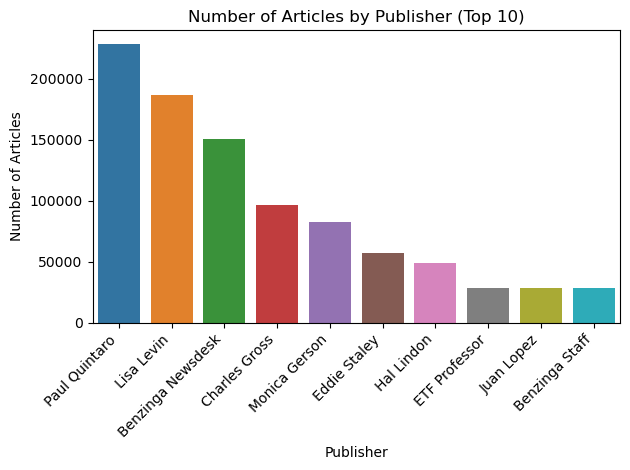

C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


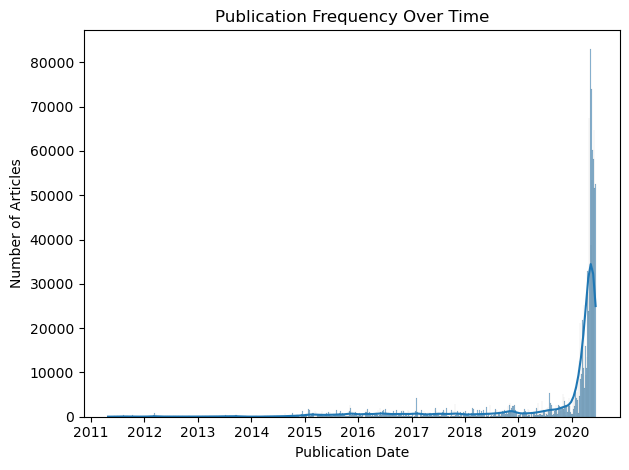

In [ ]:
# Data path
data_path = "../data/raw_analyst_ratings.csv"

# Load and clean the data
clean_data = load_and_clean_data(data_path)

# Perform EDA if data is loaded successfully
if clean_data is not None:
    perform_eda(clean_data)
else:
    print("Data loading failed, unable to perform EDA.")